## Data Set Overview

### Load Packages

In [88]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# custom plot
from sbcustom import *

### Set Options

In [89]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 6

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

Read Dataset

In [90]:
bikeshare = pd.read_csv('train.csv', parse_dates=["datetime"])

Shape of the Data

In [91]:
print('Shape of data: ', bikeshare.shape)

Shape of data:  (10886, 12)


Few Observations

In [92]:
bikeshare.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


Feature Data Types

In [93]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Feature Statistics Summary

In [94]:
bikeshare.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
...,...,...,...,...,...,...,...,...,...,...,...
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.45,100.00,57.00,367.00,886.00,977.00


## EDA

Converting into categorical data

In [95]:
category_list = ['season', 'holiday', 'workingday', 'weather']

Mapping numbers to categorical data

In [96]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_dict = {1: 'Clear', 2: 'Misty+Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}
bikeshare['season'] = bikeshare['season'].map(season_dict)
bikeshare['weather'] = bikeshare['weather'].map(weather_dict)
bikeshare

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,5,27,32
...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.91,61,15.00,4,164,168
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.43,61,6.00,12,117,129
10885,2012-12-19 23:00:00,Winter,0,1,Clear,13.12,16.66,66,9.00,4,84,88


season에서 1: Spring, 2: Summer, 3: Fall, 4: Winter

weather에서 1: Clear, 2: Misty+Cloudy, 3: Light Snow/Rain, 4: Heavy Snow/Rain

해당 값으로 mapping

해당 데이터 셋에서 우리가 아는 계절과 다른 경향

1~3월: Spring, 4~6월: Summer, 7~9월: Fall, 10~12월: Winter

To Categorical type

In [97]:
bikeshare['season'] = pd.Categorical(
    bikeshare['season'],
    categories=['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)

bikeshare['weather'] = pd.Categorical(
    bikeshare['weather'],
    categories=['Clear', 'Misty+Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain'],
    ordered = True
)

bikeshare['workingday'] = pd.Categorical(
    bikeshare['workingday'],
    categories=[0, 1],
    ordered = True
)

bikeshare['holiday'] = pd.Categorical(
    bikeshare['holiday'],
    categories=[0, 1],
    ordered = True
)

Categorical type으로 변경

Distribution with Weather, Season, WorkingDay, Holiday

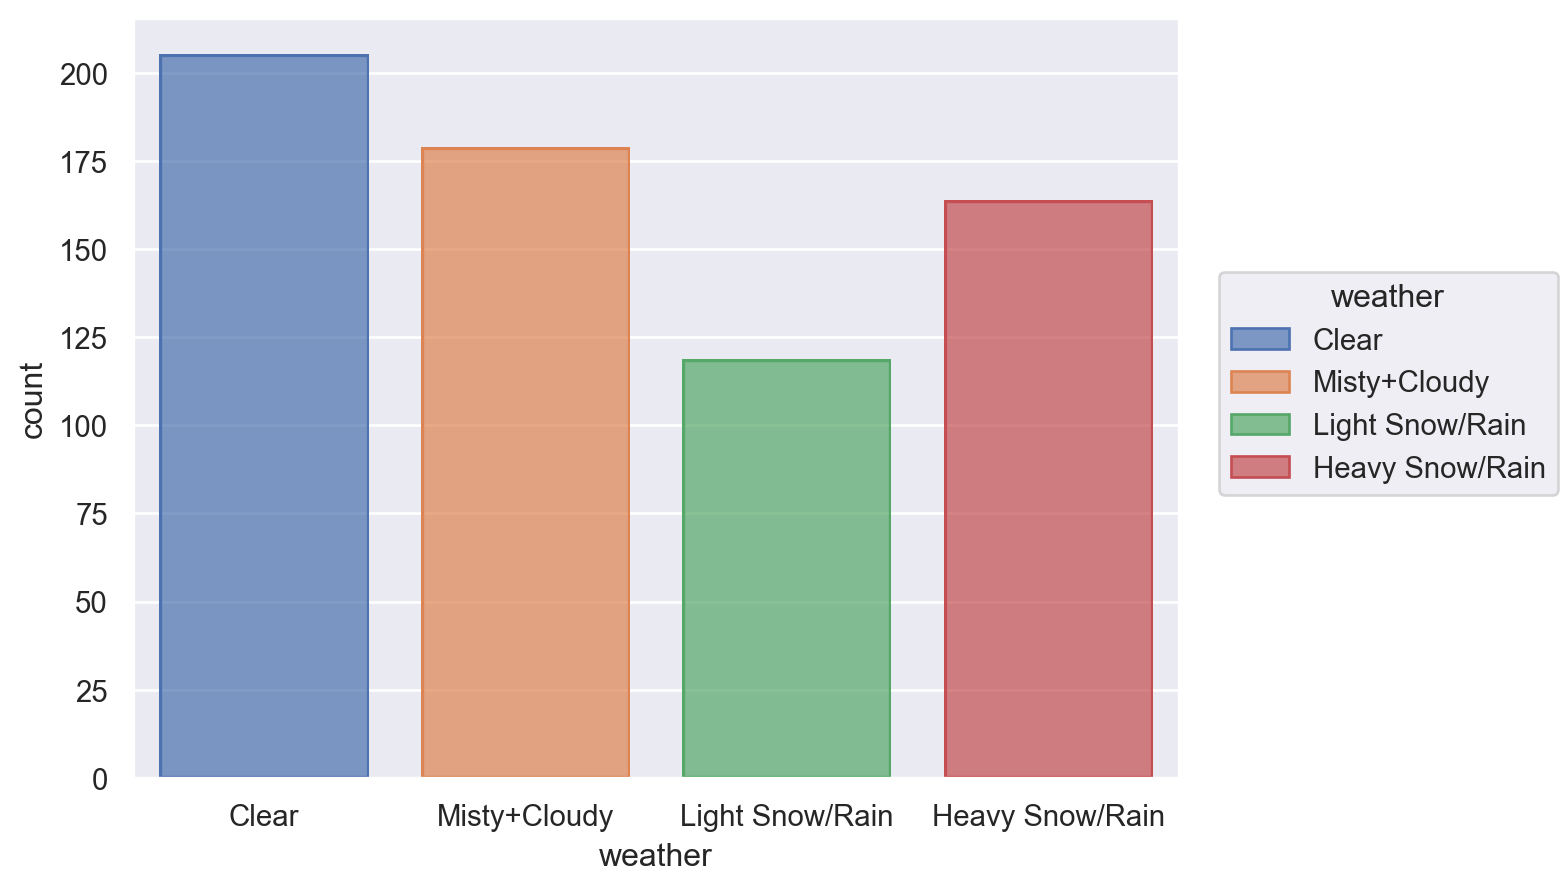

In [98]:
group_weather = bikeshare.groupby('weather')['count'].mean().reset_index()
(
    so.Plot(group_weather, x='weather', y='count')
    .add(so.Bar(), color = 'weather')
)

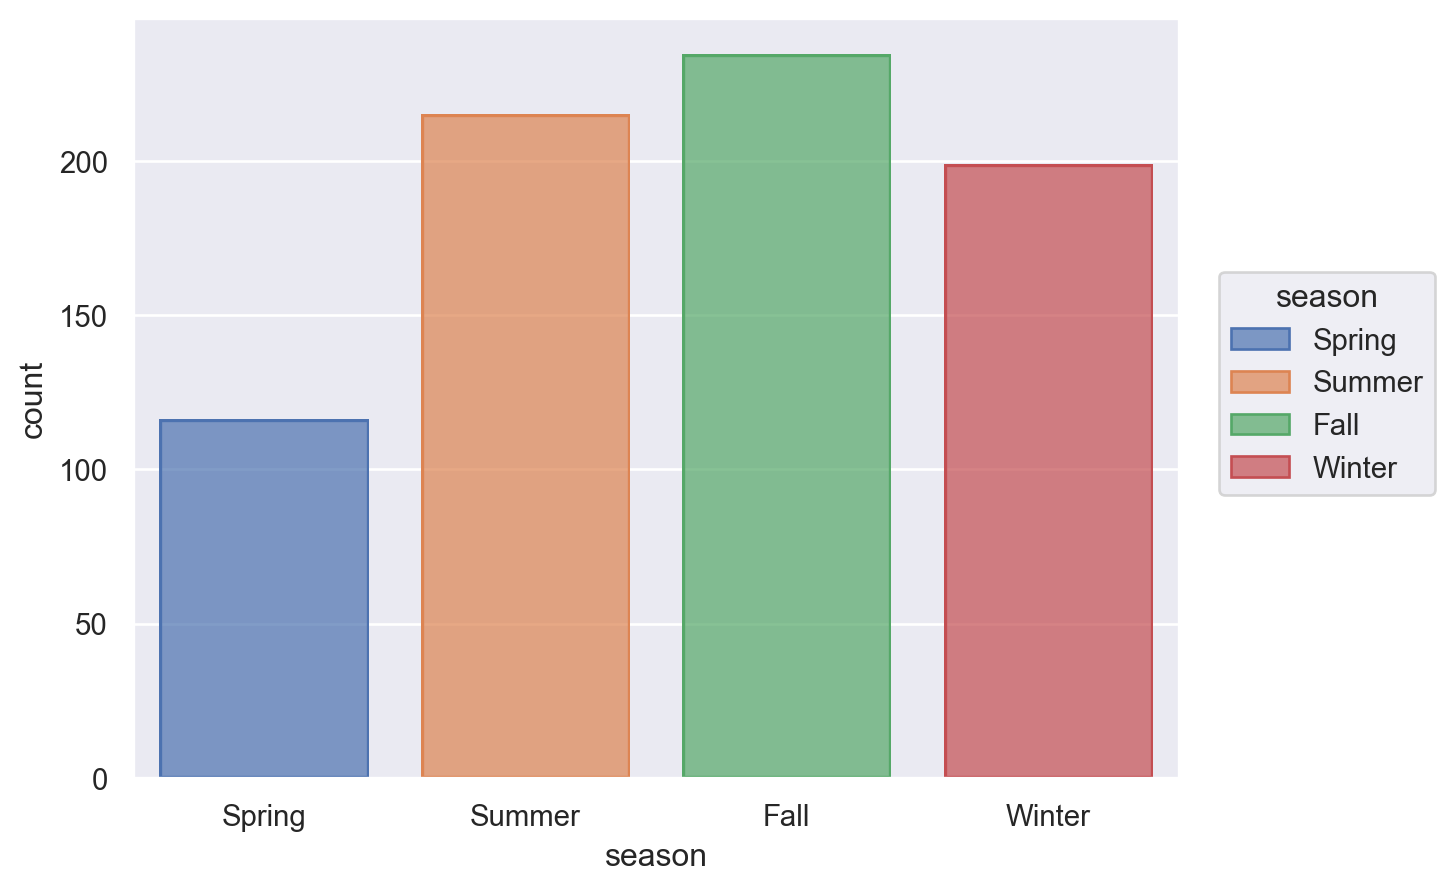

In [99]:
group_season = bikeshare.groupby('season')['count'].mean().reset_index()
(
    so.Plot(group_season, x='season', y='count')
    .add(so.Bar(), color = 'season')
)

일반적으로 Spring에 가장 적고, Fall에 가장 많은 경향

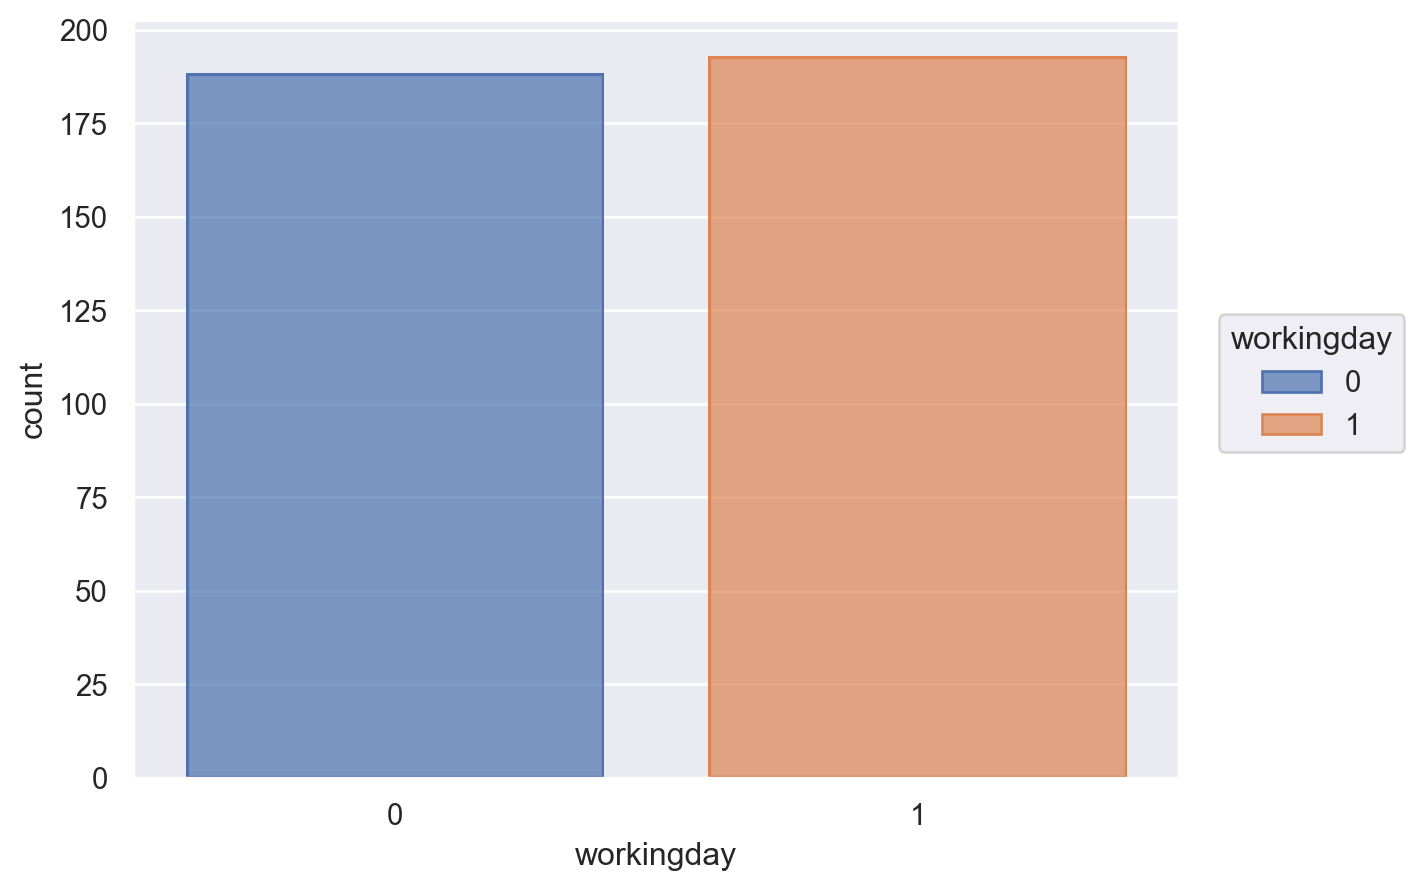

In [100]:
group_workingday = bikeshare.groupby('workingday')['count'].mean().reset_index()
(
    so.Plot(group_workingday, x='workingday', y='count')
    .add(so.Bar(), color='workingday')
)

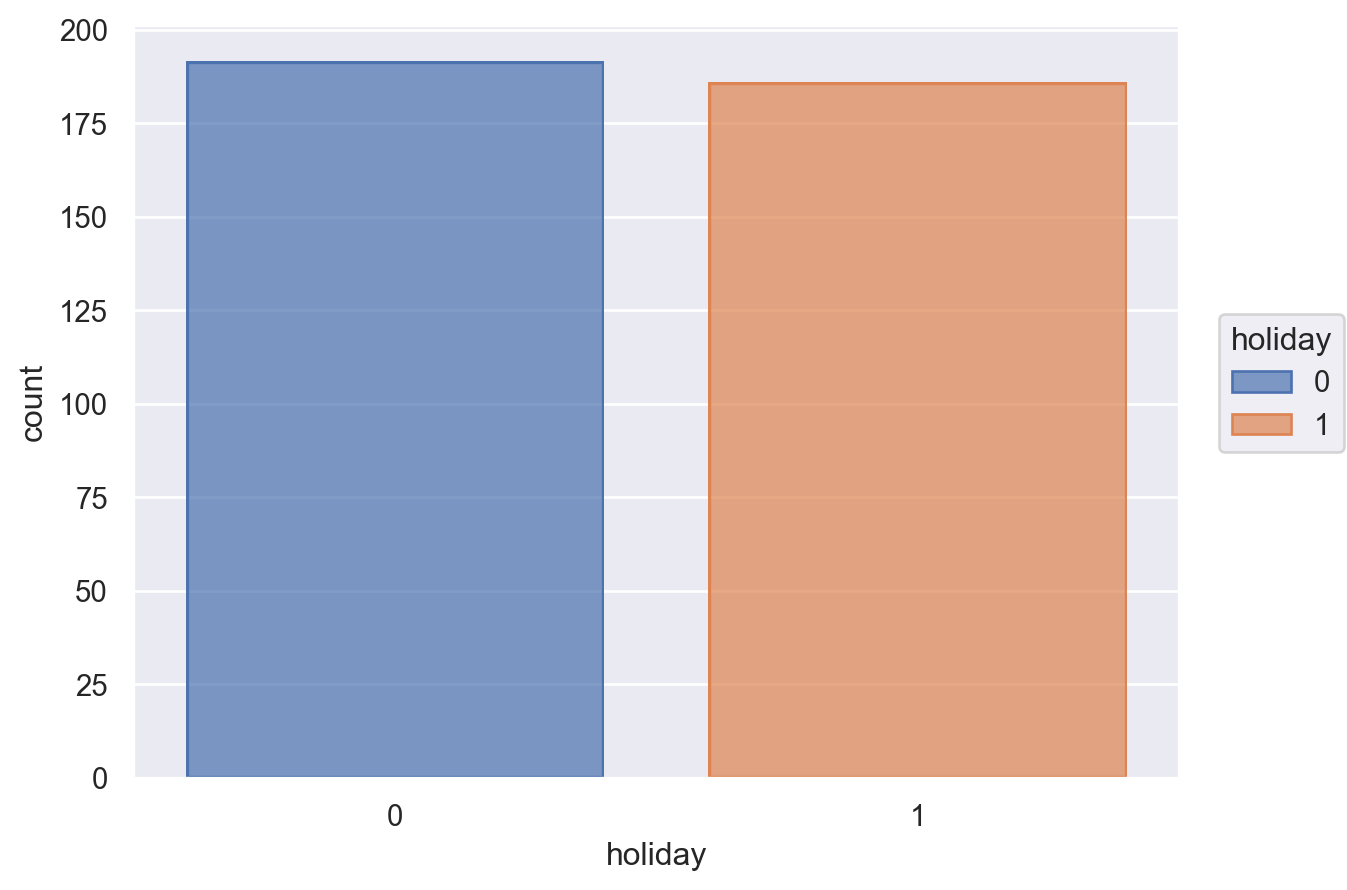

In [101]:
group_holiday = bikeshare.groupby('holiday')['count'].mean().reset_index()
(
    so.Plot(group_holiday, x='holiday', y='count')
    .add(so.Bar(), color =  'holiday')
)

<Axes: title={'center': 'count'}, xlabel='weather'>

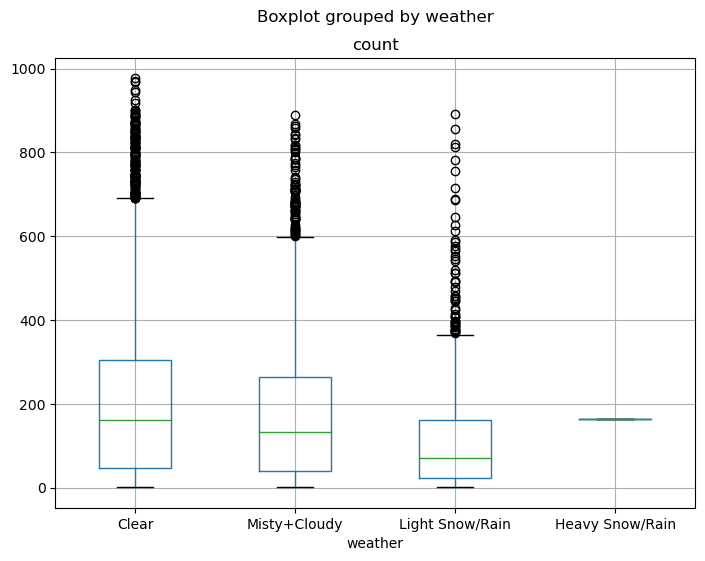

In [102]:
bikeshare.boxplot(column='count', by='weather', figsize=(8, 6))

<Axes: title={'center': 'count'}, xlabel='season'>

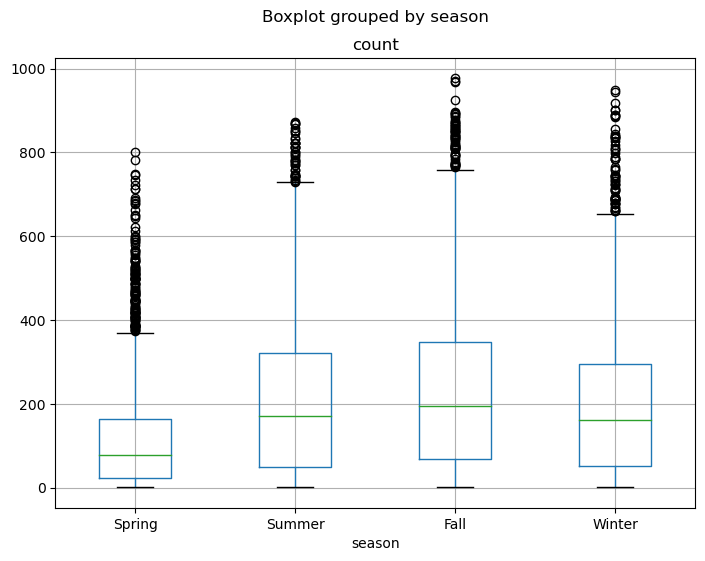

In [103]:
bikeshare.boxplot(column='count', by='season', figsize=(8, 6))

<Axes: title={'center': 'count'}, xlabel='workingday'>

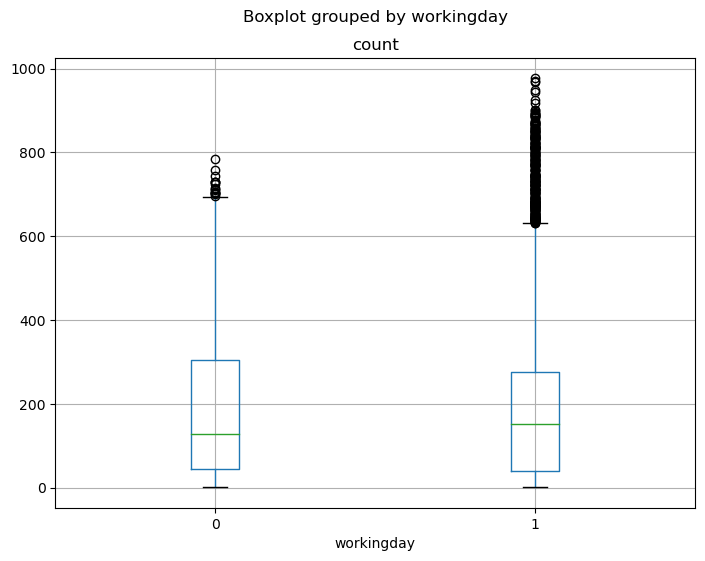

In [104]:
bikeshare.boxplot(column='count', by='workingday', figsize=(8, 6))

<Axes: title={'center': 'count'}, xlabel='holiday'>

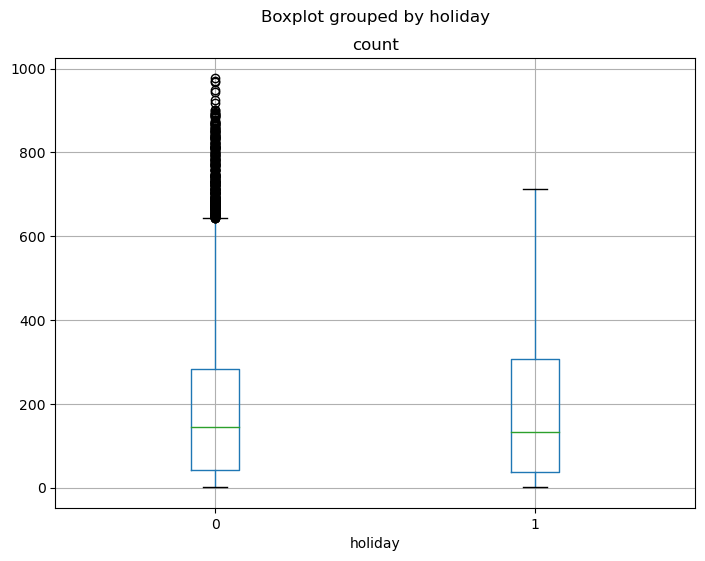

In [105]:
bikeshare.boxplot(column='count', by='holiday', figsize=(8, 6))

In [106]:
bikeshare["year"] = bikeshare["datetime"].dt.year
bikeshare["date"] = bikeshare["datetime"].dt.date
bikeshare["day"] = bikeshare["datetime"].dt.day_of_year
bikeshare["weekday"] = bikeshare["datetime"].dt.weekday
bikeshare["time"] = bikeshare["datetime"].dt.hour

In [107]:
day_dict = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
bikeshare['weekday'] = bikeshare['weekday'].map(day_dict)

In [108]:
bikeshare

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,date,day,weekday,time
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.39,81,0.00,3,13,16,2011,2011-01-01,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,8,32,40,2011,2011-01-01,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,5,27,32,2011,2011-01-01,1,Saturday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.91,61,15.00,4,164,168,2012,2012-12-19,354,Wednesday,21
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.43,61,6.00,12,117,129,2012,2012-12-19,354,Wednesday,22
10885,2012-12-19 23:00:00,Winter,0,1,Clear,13.12,16.66,66,9.00,4,84,88,2012,2012-12-19,354,Wednesday,23


In [109]:
bikeshare["year"] = pd.Categorical(
    bikeshare["year"],
    categories=[2011, 2012],
    ordered = True
)

bikeshare["time"] = pd.Categorical(
    bikeshare["time"],
    categories=[x for x in range(24)],
    ordered = True
)

bikeshare["weekday"] = pd.Categorical(
    bikeshare["weekday"],
    categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered = True
)

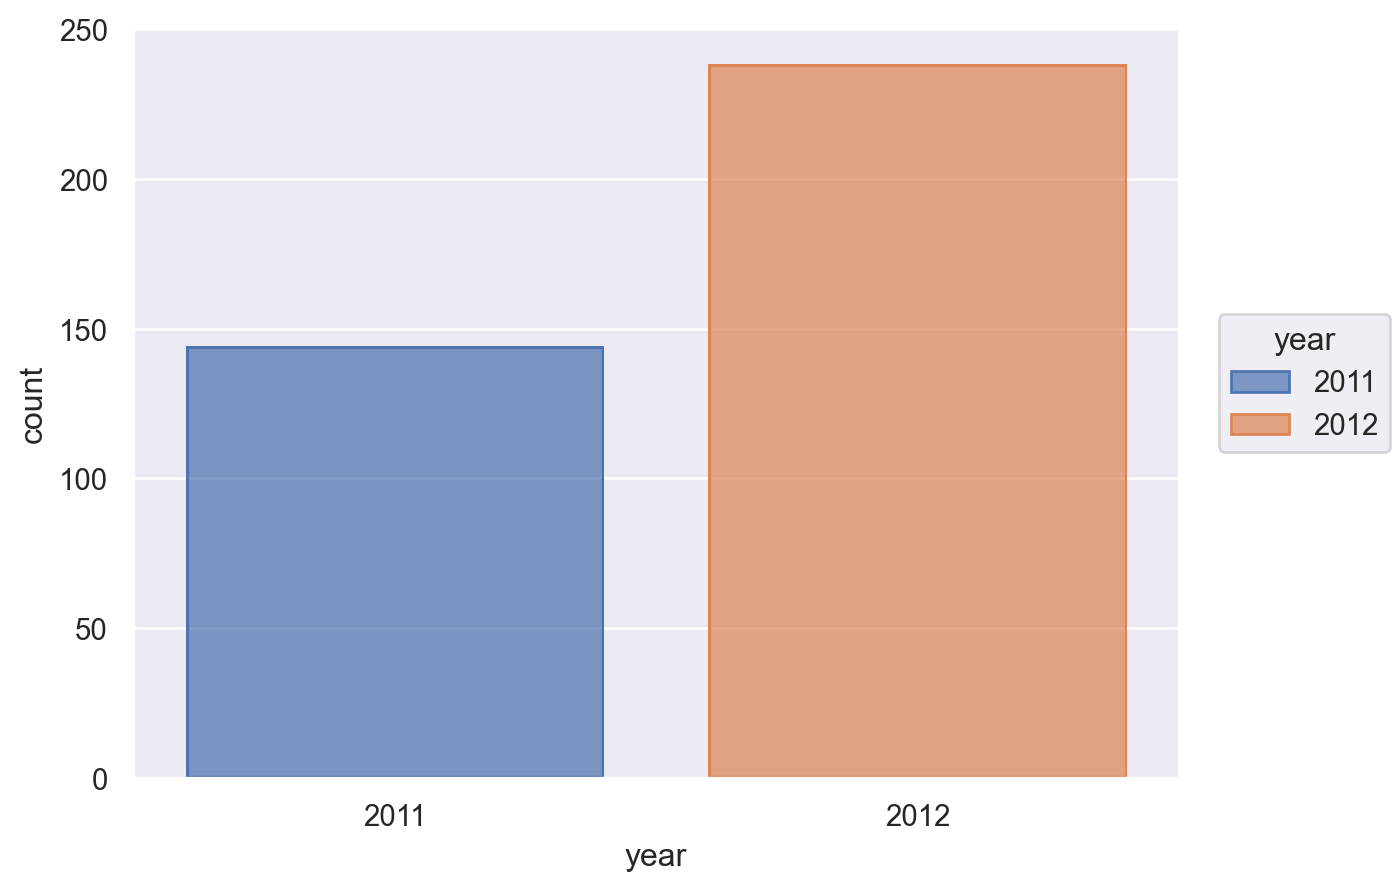

In [110]:
group_year = bikeshare.groupby('year')['count'].mean().reset_index()
(
    so.Plot(group_year, x='year', y='count')
    .add(so.Bar(), color='year')
)

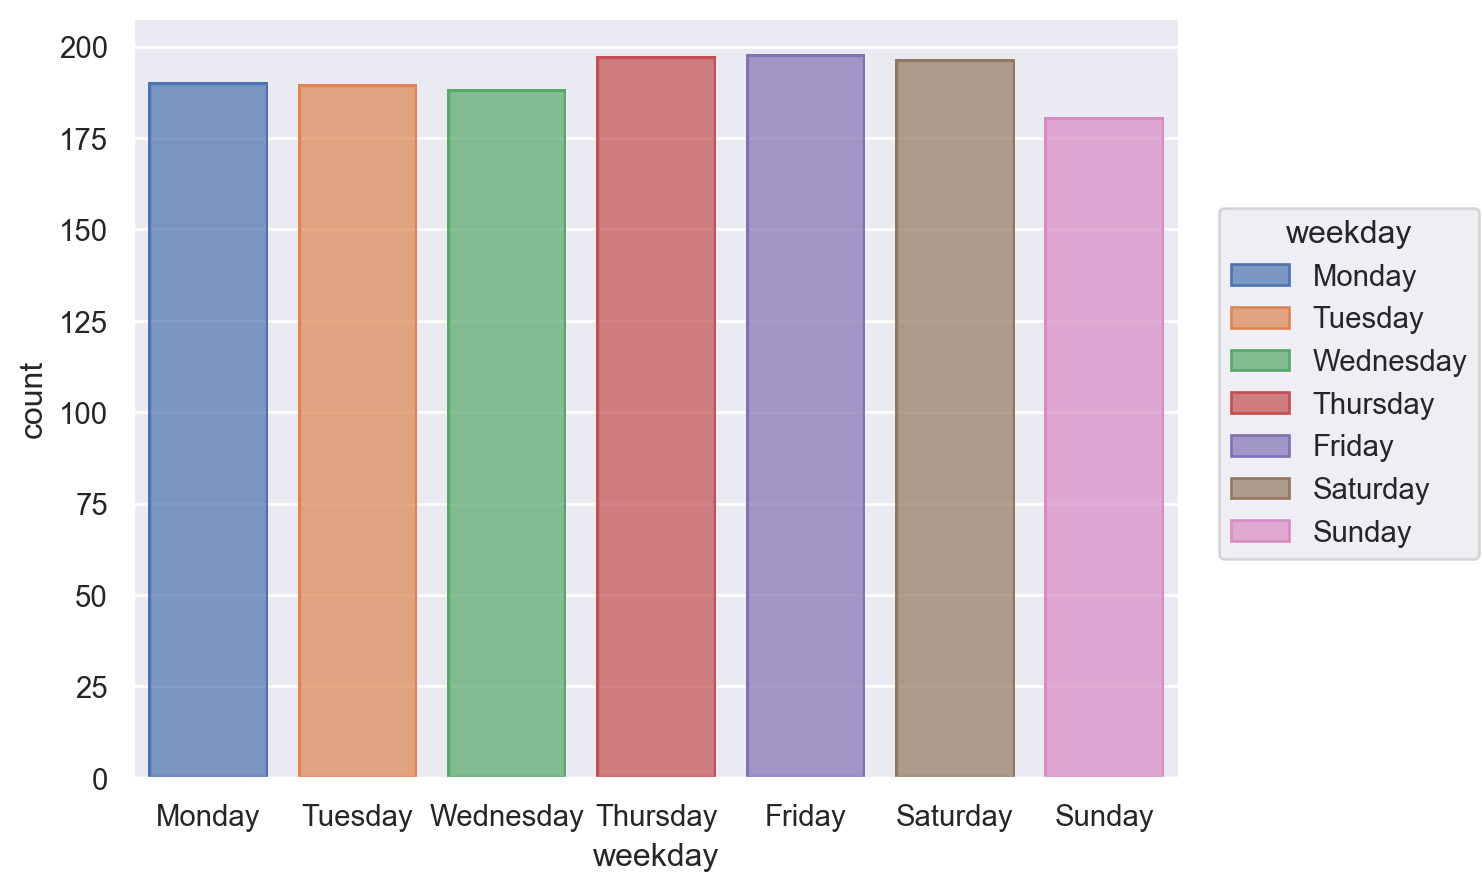

In [111]:
group_weekday = bikeshare.groupby('weekday')['count'].mean().reset_index()
(
    so.Plot(group_weekday, x='weekday', y='count')
    .add(so.Bar(), color='weekday')
)

<Axes: title={'center': 'count'}, xlabel='time'>

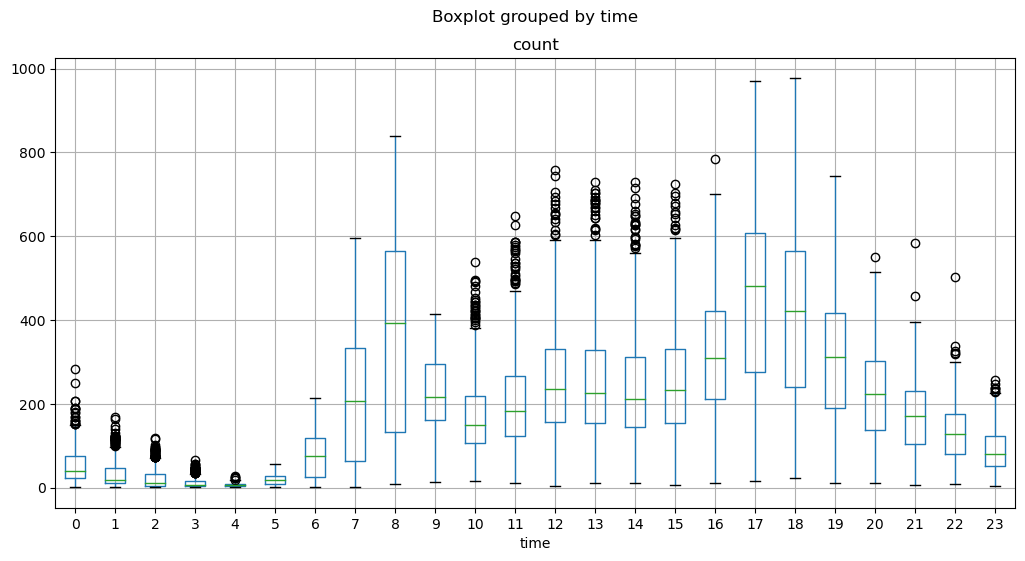

In [112]:
bikeshare.boxplot(column='count', by='time', figsize=(12, 6))

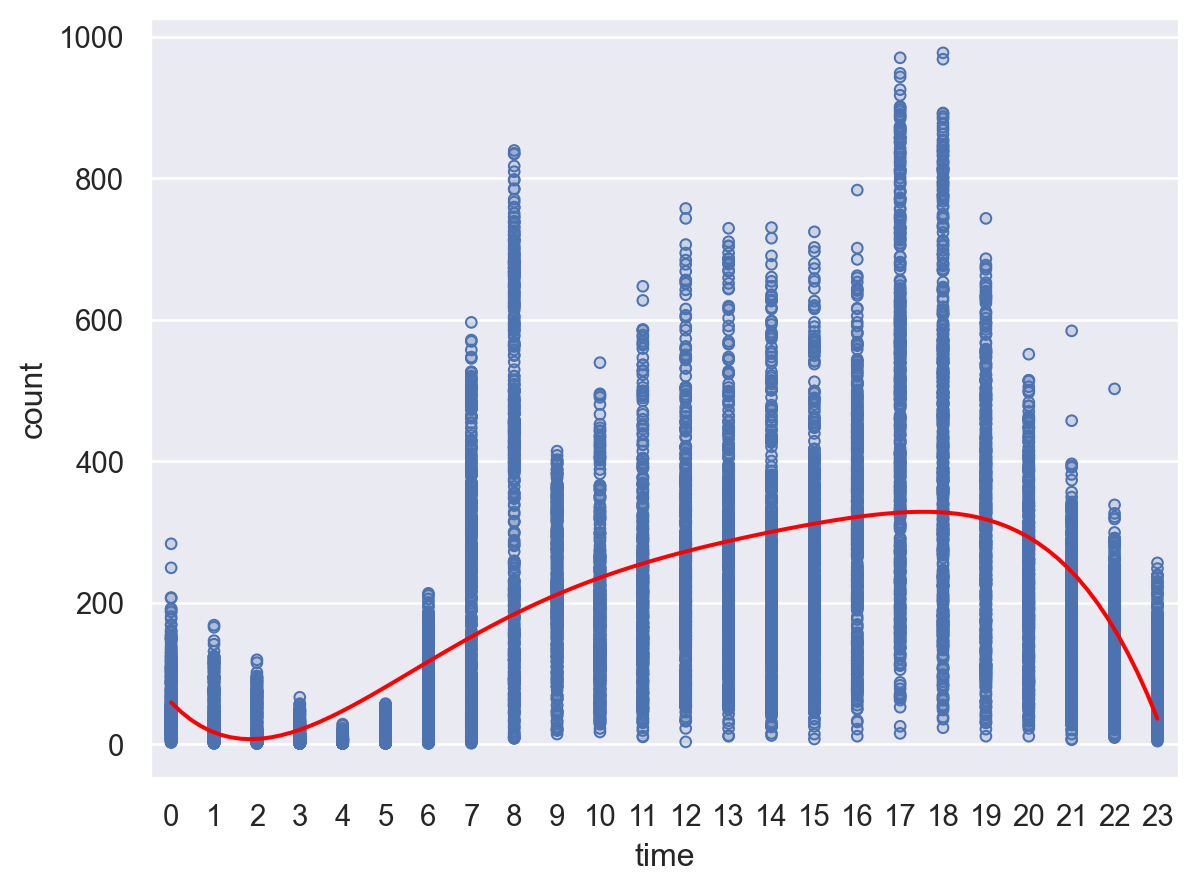

In [113]:
(
    so.Plot(bikeshare, x='time', y='count')
    .add(so.Dots())
    .add(so.Line(color = 'red'), so.PolyFit(5))
)

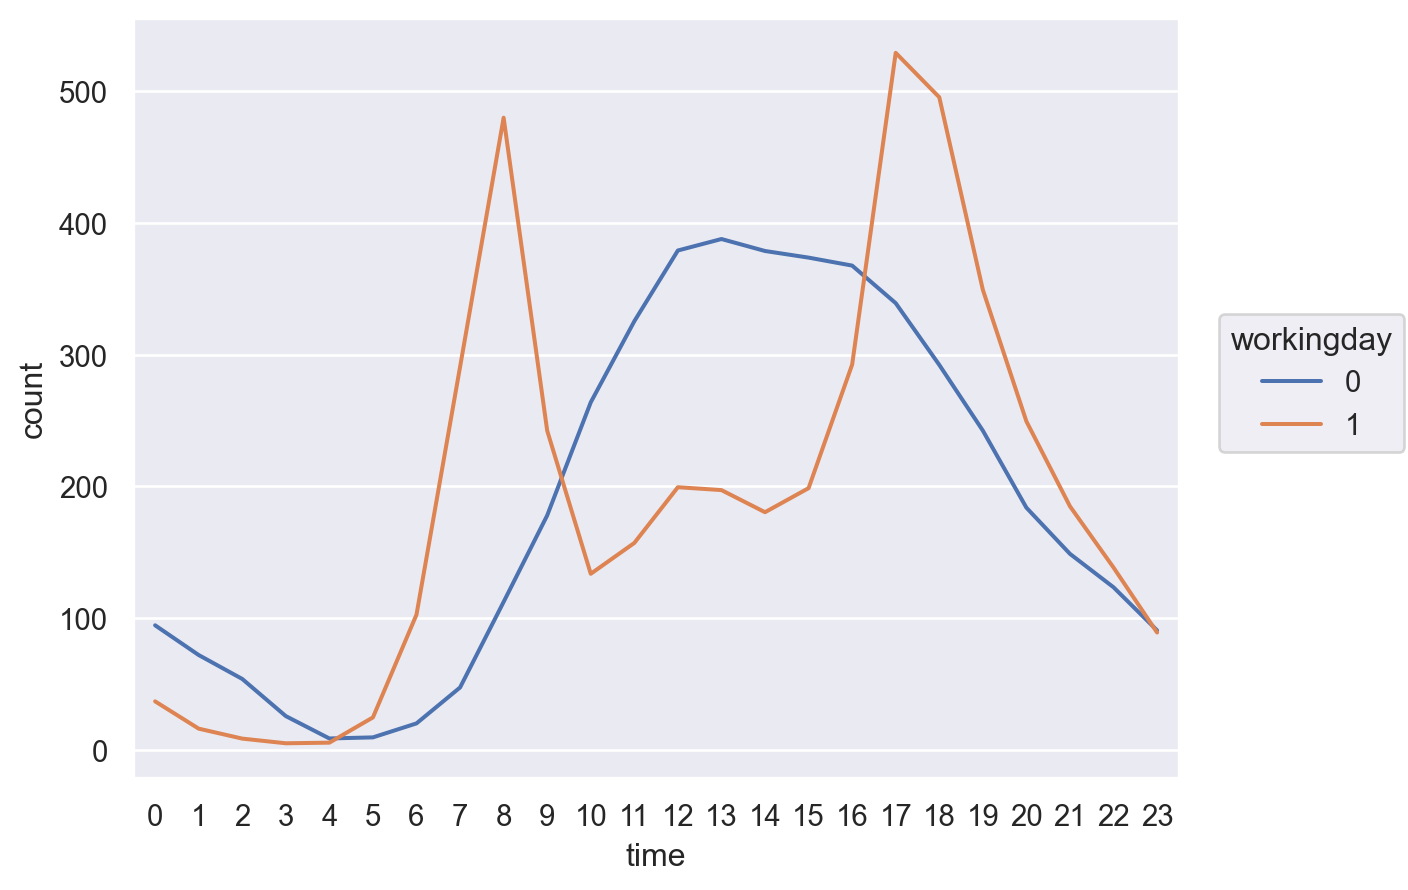

In [114]:
group_work_hour = bikeshare.groupby(['workingday', 'time'])['count'].mean().reset_index()
(
    so.Plot(group_work_hour, x='time', y='count')
    .add(so.Line(), color='workingday')
)

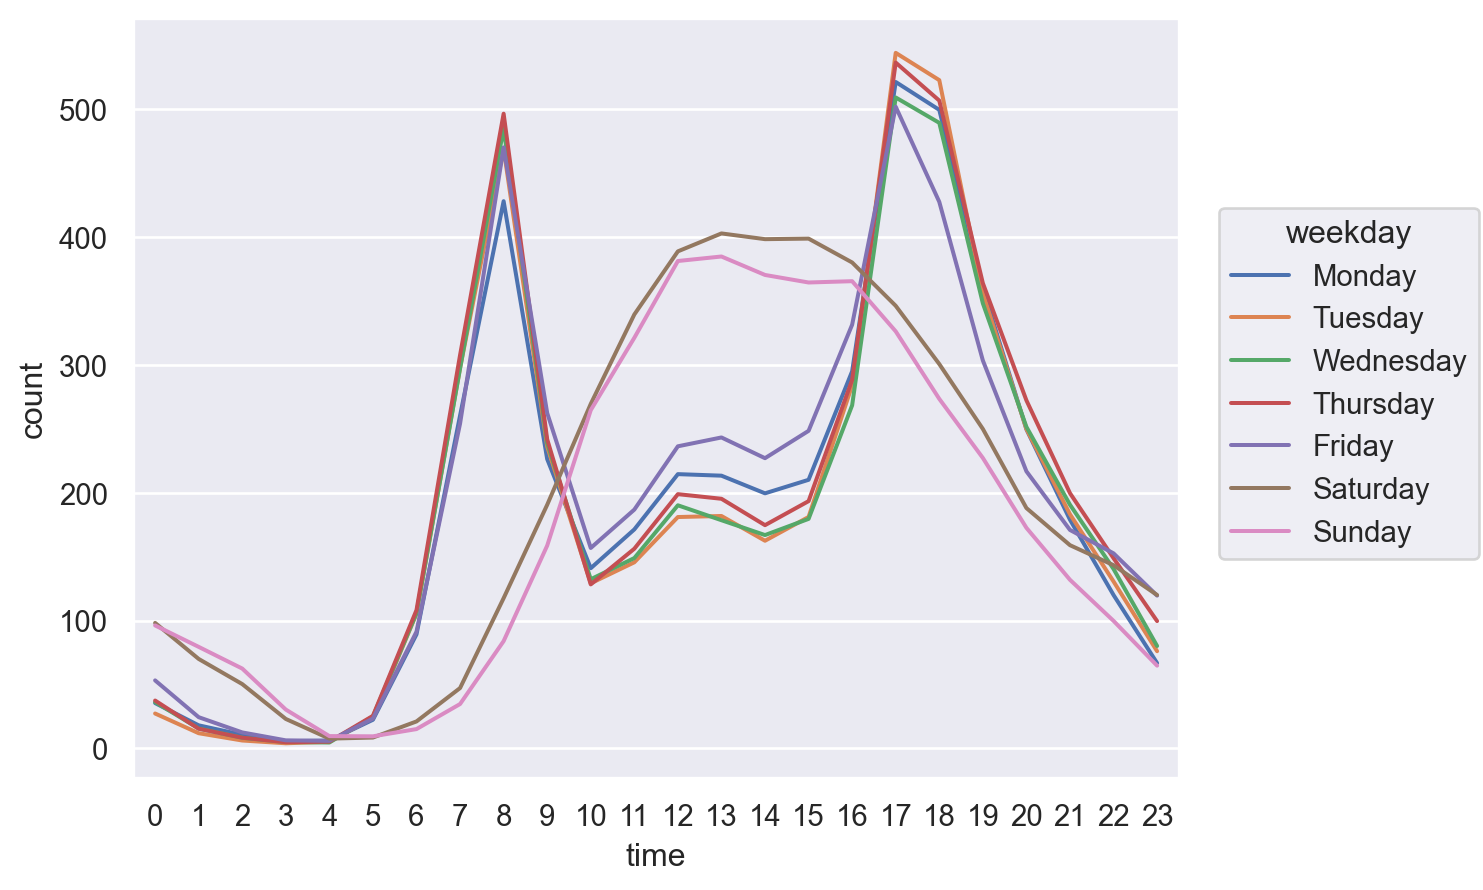

In [115]:
group_work_hour = bikeshare.groupby(['weekday', 'time'])['count'].mean().reset_index()
(
    so.Plot(group_work_hour, x='time', y='count')
    .add(so.Line(), color='weekday')
)

평일과 주말의 데이터에 대해, 수요의 차이를 보여줌. 평일에는 오후 12시경에 자전거 대여 수가 감소하는 반면 주말에는 거의 같은 시간에 수요가 최고조에 달함. 주중에 수요가 많은 시간은 7~9시, 17~19시임. 이유는 출퇴근길 교통수단으로 자전거를 대여하는 것으로 판단됨

In [116]:
bikeshare

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,date,day,weekday,time
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.39,81,0.00,3,13,16,2011,2011-01-01,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,8,32,40,2011,2011-01-01,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,5,27,32,2011,2011-01-01,1,Saturday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.91,61,15.00,4,164,168,2012,2012-12-19,354,Wednesday,21
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.43,61,6.00,12,117,129,2012,2012-12-19,354,Wednesday,22
10885,2012-12-19 23:00:00,Winter,0,1,Clear,13.12,16.66,66,9.00,4,84,88,2012,2012-12-19,354,Wednesday,23


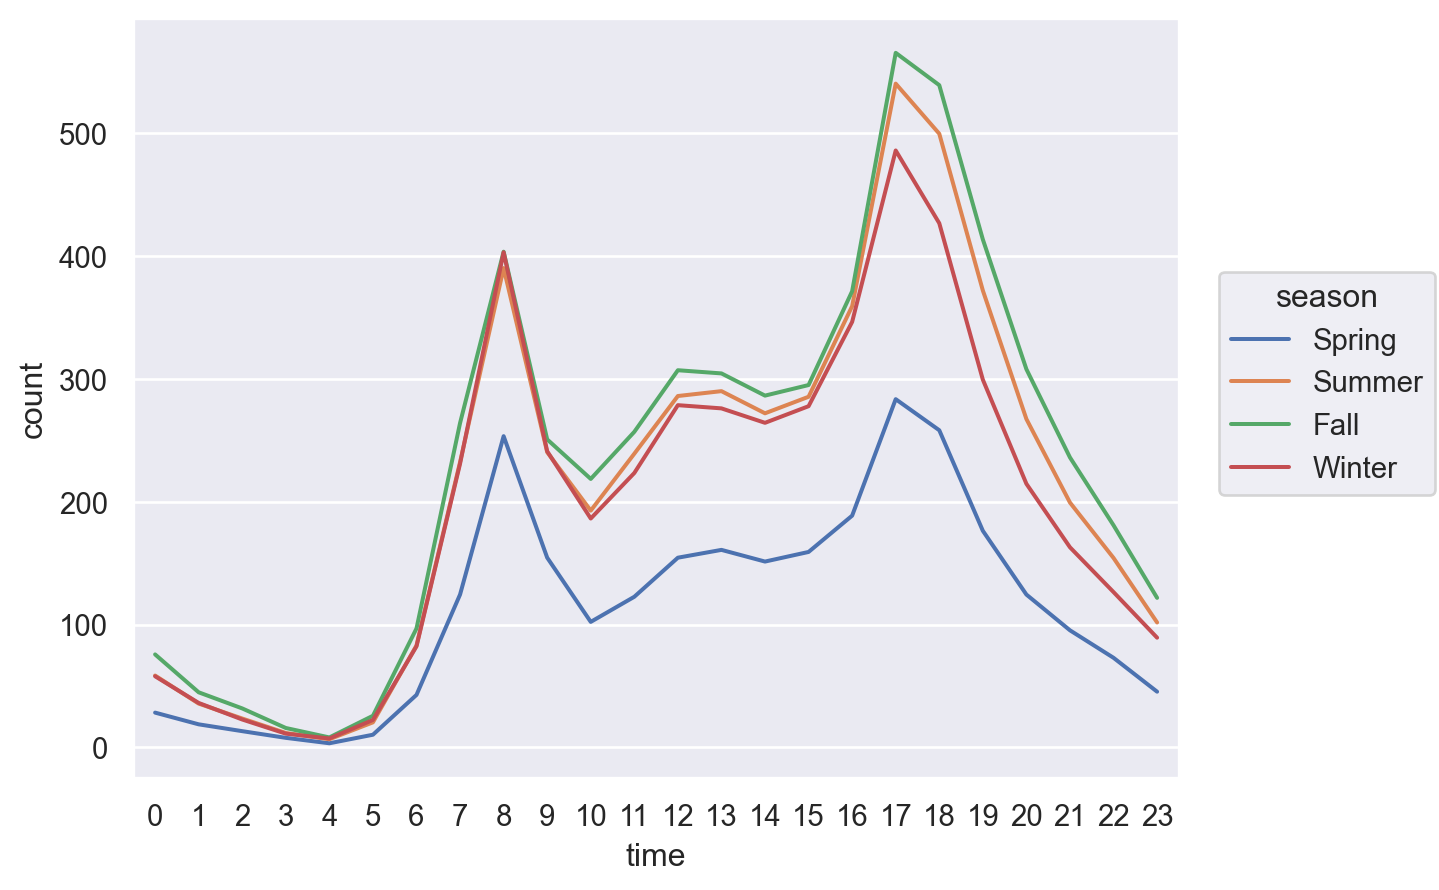

In [117]:
group_work_hour = bikeshare.groupby(['season', 'time'])['count'].mean().reset_index()
(
    so.Plot(group_work_hour, x='time', y='count')
    .add(so.Line(), color='season')
)

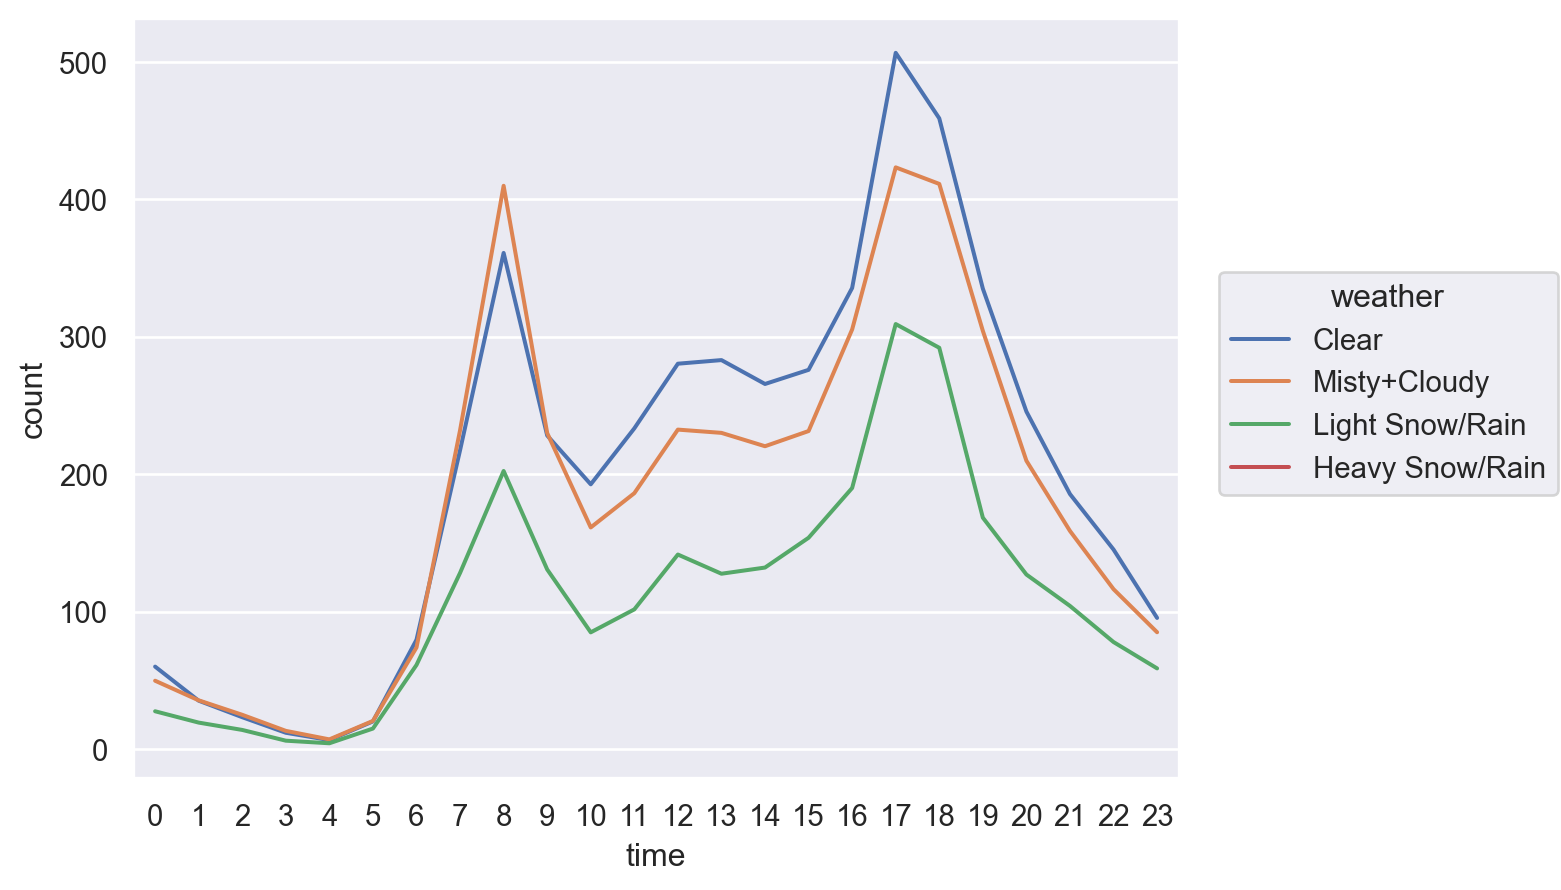

In [140]:
group_work_hour = bikeshare.groupby(['weather', 'time'])['count'].mean().reset_index()
(
    so.Plot(group_work_hour, x='time', y='count')
    .add(so.Line(), color='weather')
)

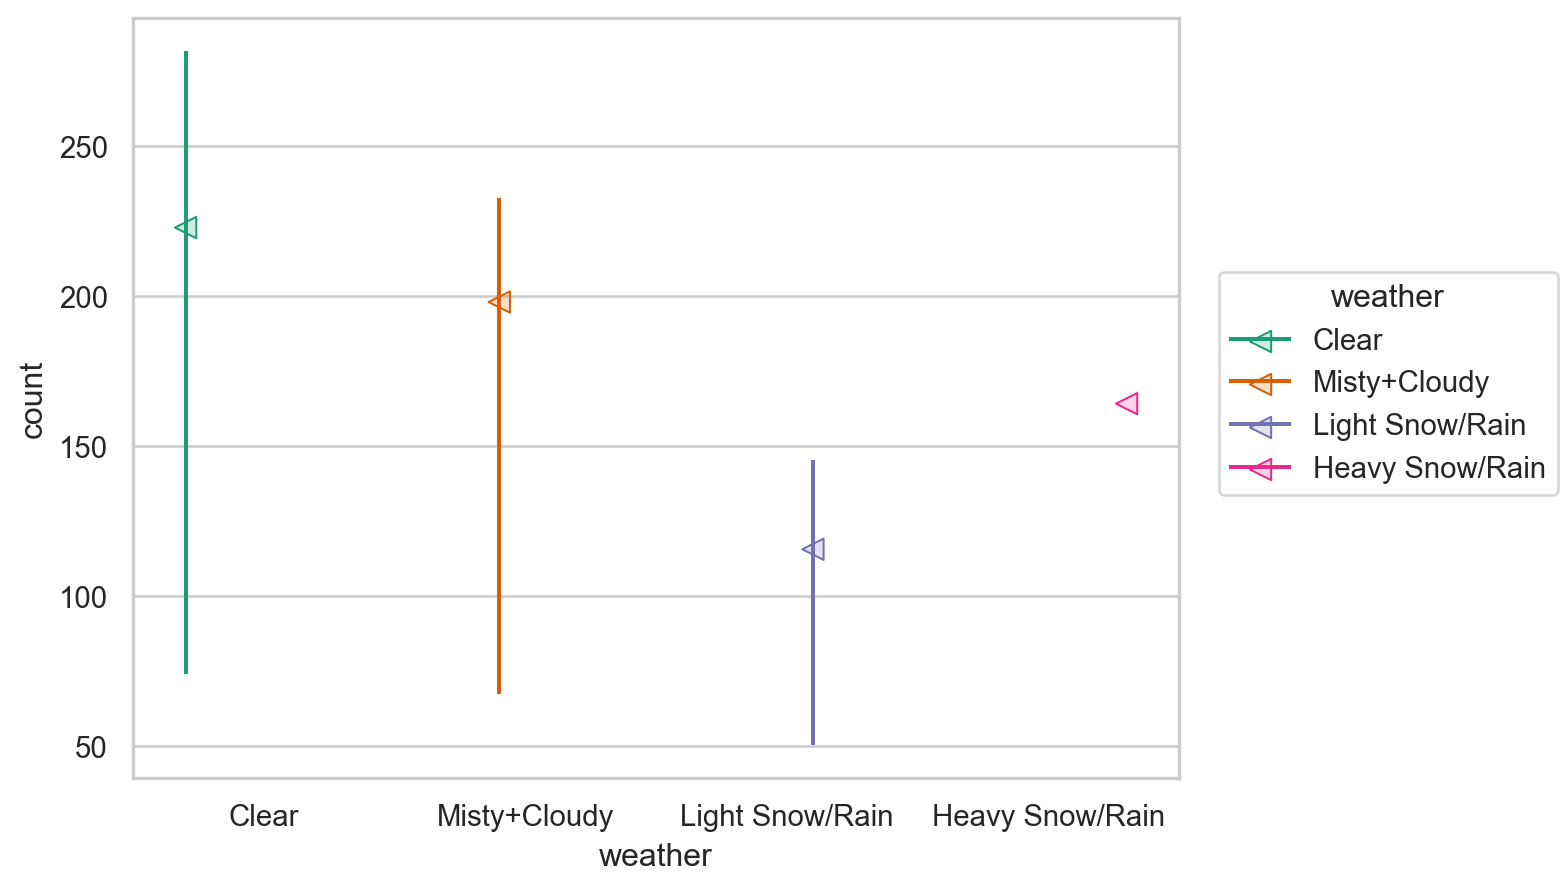

In [133]:
rangeplot(group_work_hour, x='weather', y='count', color='weather')

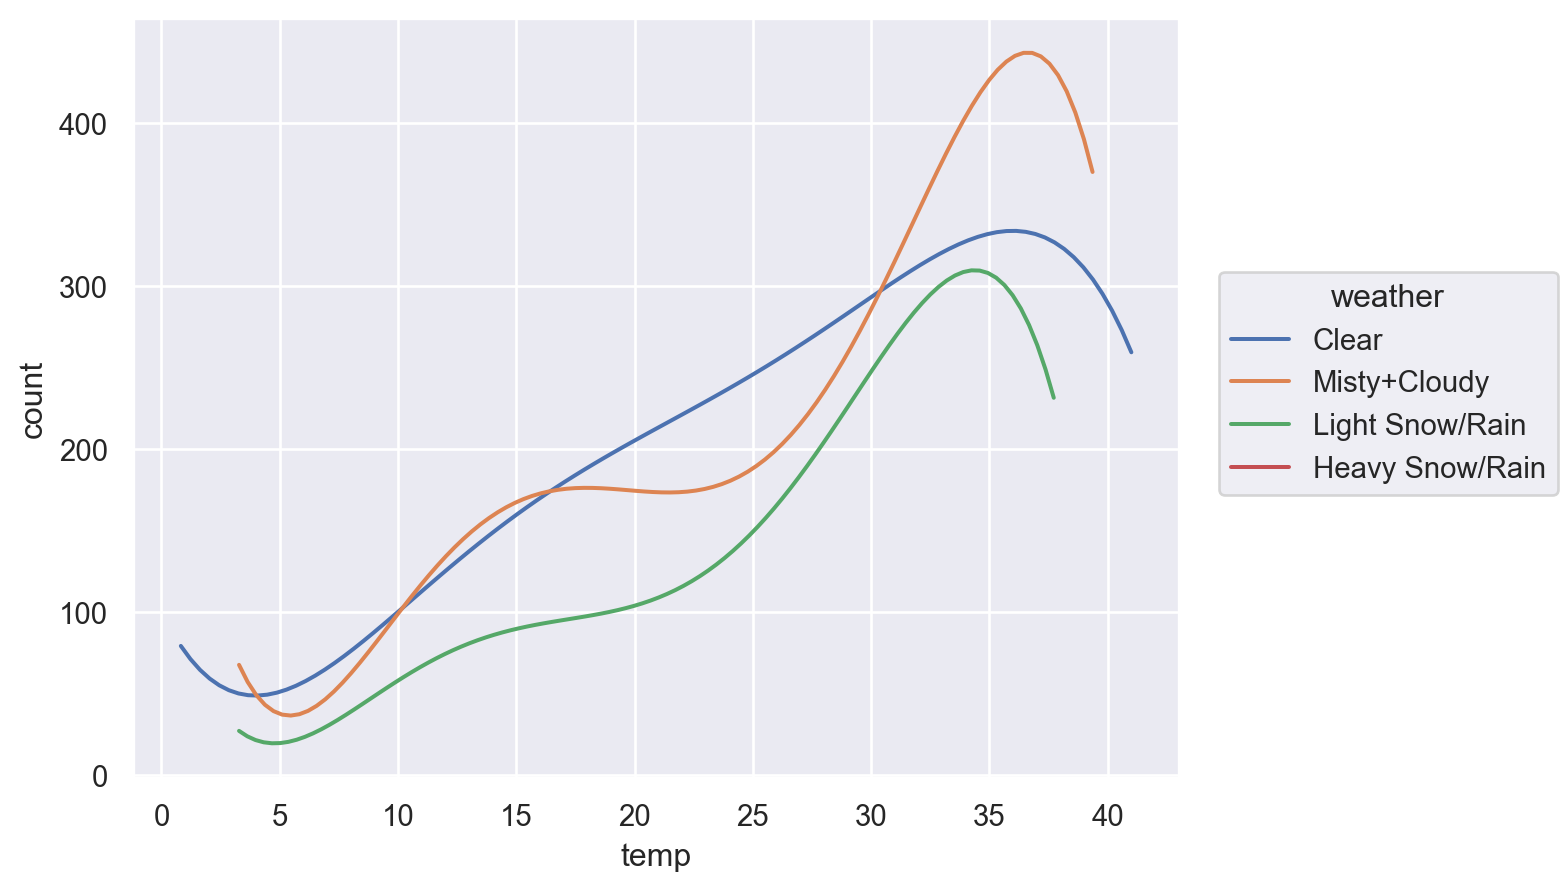

In [135]:
temp_with_weather = bikeshare.groupby(['temp', 'weather'])['count'].mean().reset_index()
(
    so.Plot(temp_with_weather, x='temp', y='count', color='weather')
    .add(so.Line(), so.PolyFit(5))
)

일반적으로 기온이 높을수록 자전거 대여수가 많은 경향

/var/folders/0t/hxdzsprx1rn_mxdx32s1x0s80000gn/T/ipykernel_61833/2993265898.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  bikeshare_melt = bikeshare.melt(id_vars='time', value_vars=['casual', 'registered'], value_name='count', var_name='casual_registered')


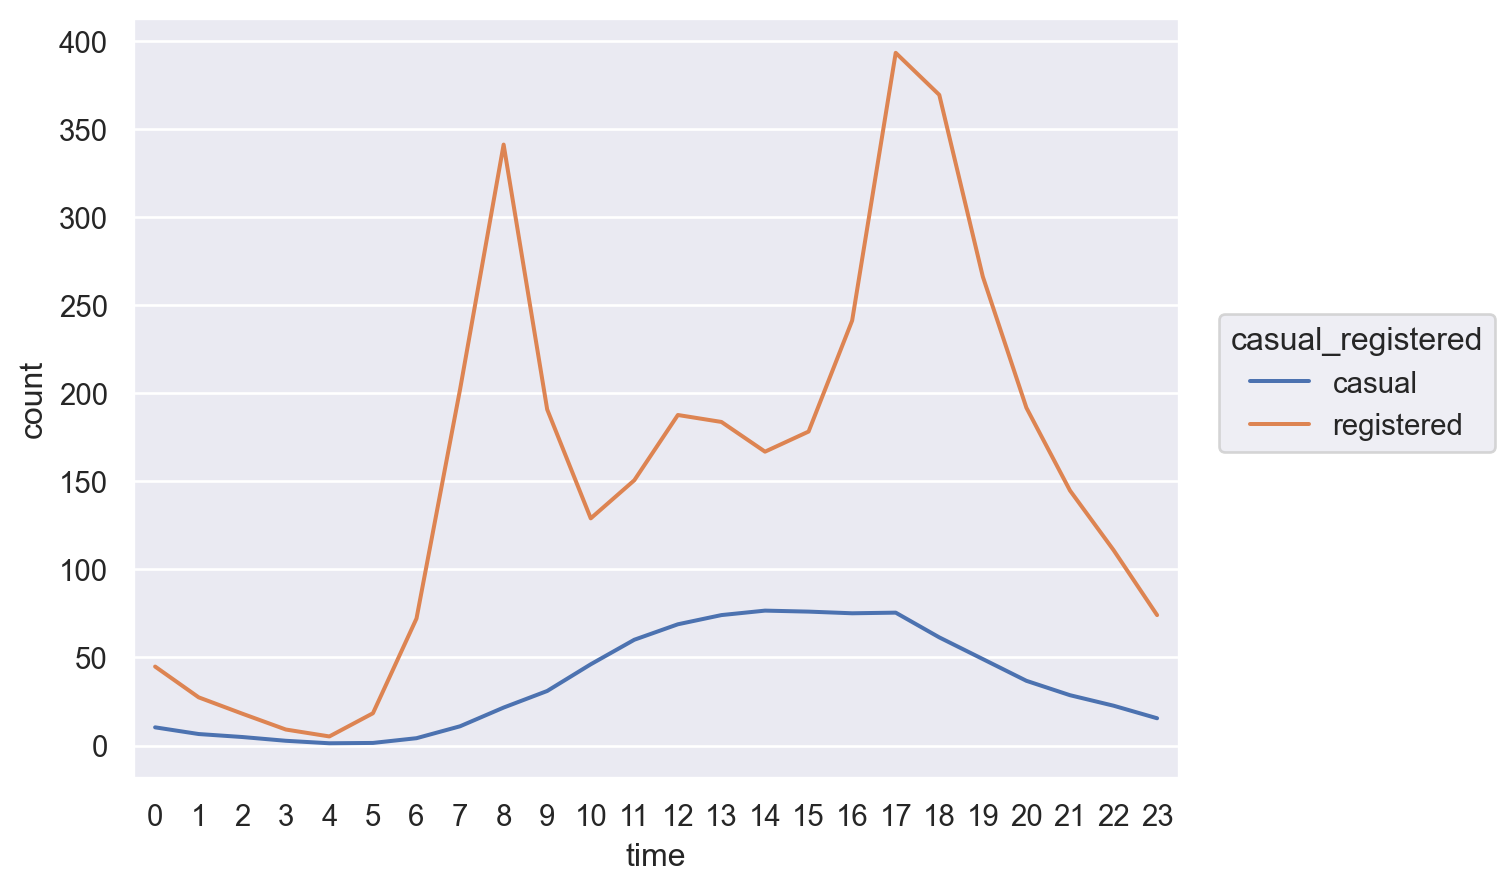

In [120]:
bikeshare_melt = bikeshare.melt(id_vars='time', value_vars=['casual', 'registered'], value_name='count', var_name='casual_registered')
group_casual_hour = bikeshare_melt.groupby(['time', 'casual_registered'])['count'].mean().reset_index()
(
    so.Plot(group_casual_hour, x='time', y='count')
    .add(so.Line(), color = 'casual_registered')
)

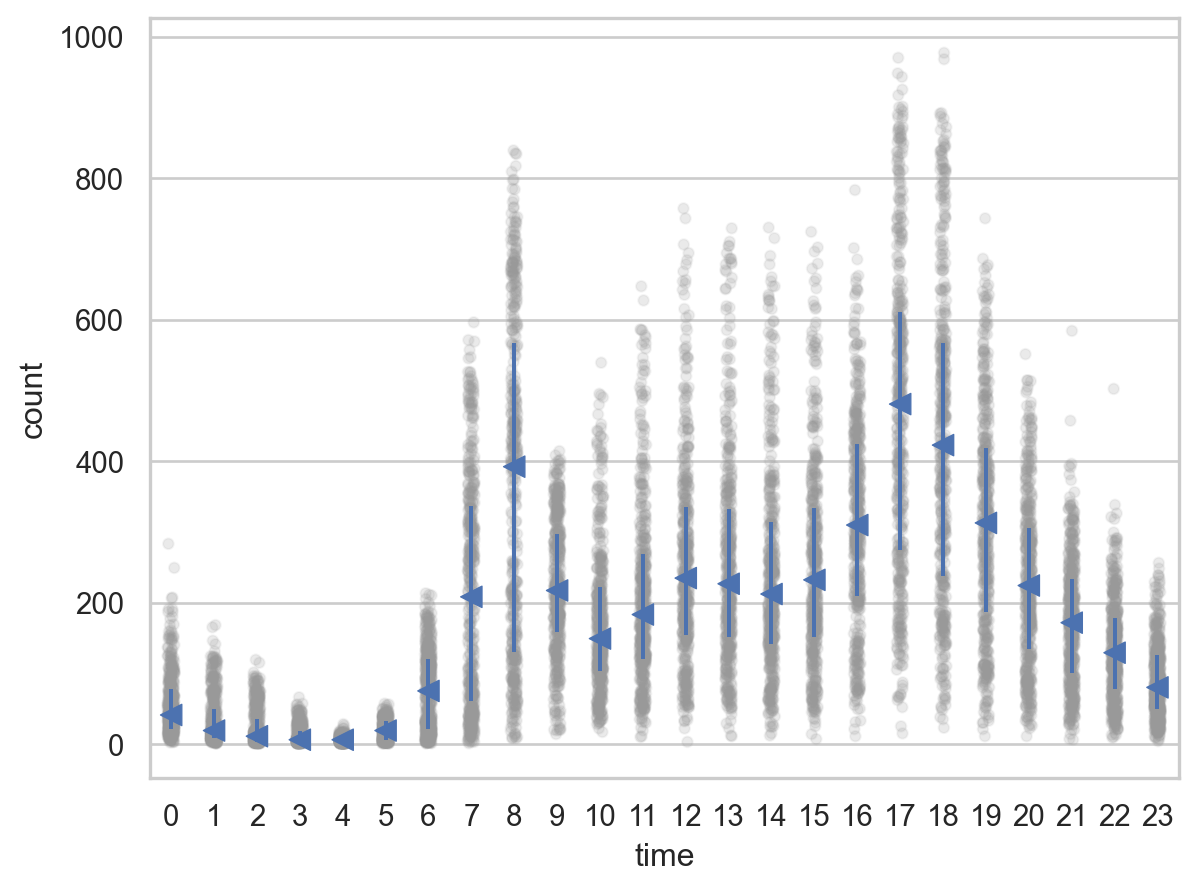

In [121]:
boxplot(bikeshare, 'time', 'count')

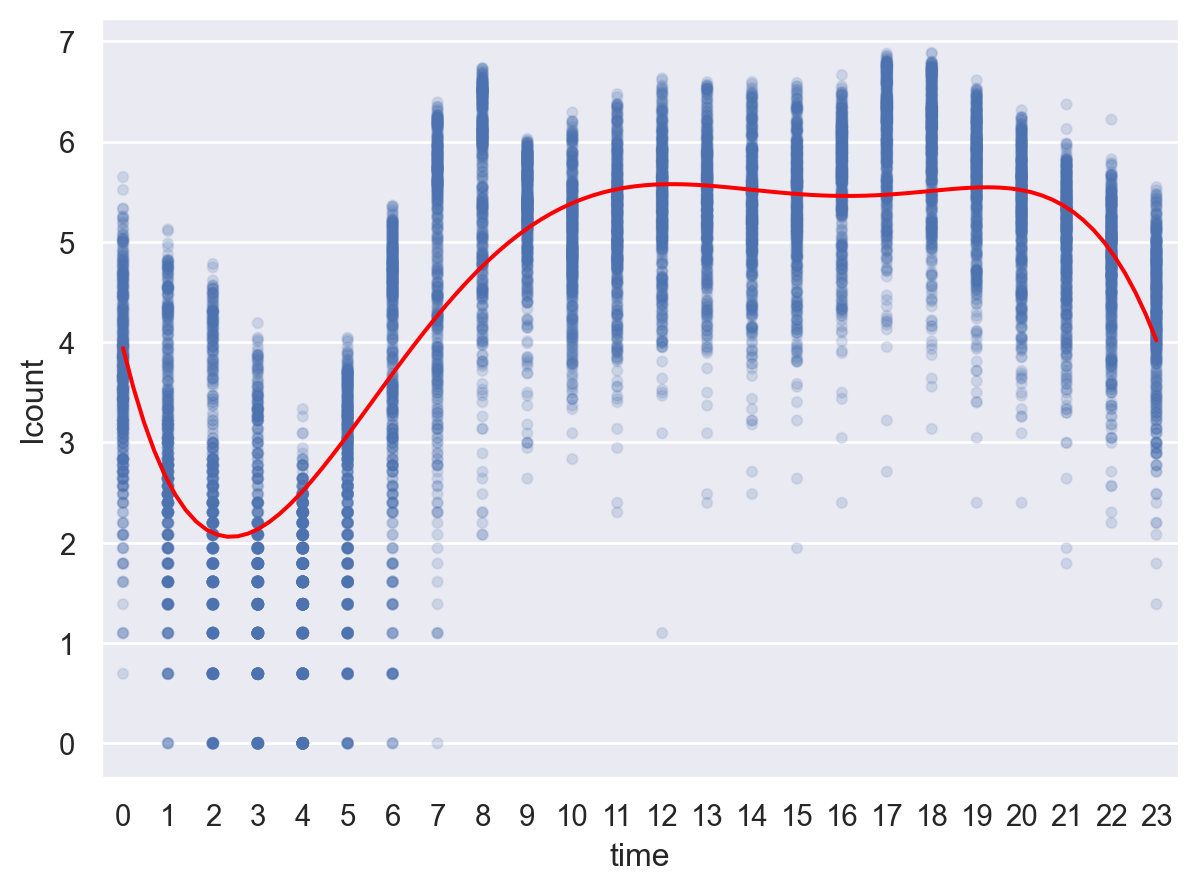

In [122]:
bikeshare_count_log = bikeshare.assign(
    lcount = lambda x: np.log(x['count'])
)
(
    so.Plot(bikeshare_count_log, x='time', y='lcount')
    .add(so.Dots(alpha=.1))
    .add(so.Line(color='red'), so.PolyFit(5))
)

count column에 log scale을 적용

## Modelling

In [123]:
bikeshare_count_log

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,date,day,weekday,time,lcount
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.39,81,0.00,3,13,16,2011,2011-01-01,1,Saturday,0,2.77
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,8,32,40,2011,2011-01-01,1,Saturday,1,3.69
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,5,27,32,2011,2011-01-01,1,Saturday,2,3.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.91,61,15.00,4,164,168,2012,2012-12-19,354,Wednesday,21,5.12
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.43,61,6.00,12,117,129,2012,2012-12-19,354,Wednesday,22,4.86
10885,2012-12-19 23:00:00,Winter,0,1,Clear,13.12,16.66,66,9.00,4,84,88,2012,2012-12-19,354,Wednesday,23,4.48


In [124]:
time_share = bikeshare_count_log.groupby(['time', 'season', 'weather'])['lcount'].size().reset_index()
time_share

,time,season,weather,lcount
0,0,Spring,Clear,72
1,0,Spring,Misty+Cloudy,33
2,0,Spring,Light Snow/Rain,8
...,...,...,...,...
381,23,Winter,Misty+Cloudy,28
382,23,Winter,Light Snow/Rain,8
383,23,Winter,Heavy Snow/Rain,0


In [125]:
time_share.groupby('time')['lcount'].sum().reset_index()

,time,lcount
0,0,455
1,1,454
2,2,448
...,...,...
21,21,456
22,22,456
23,23,456


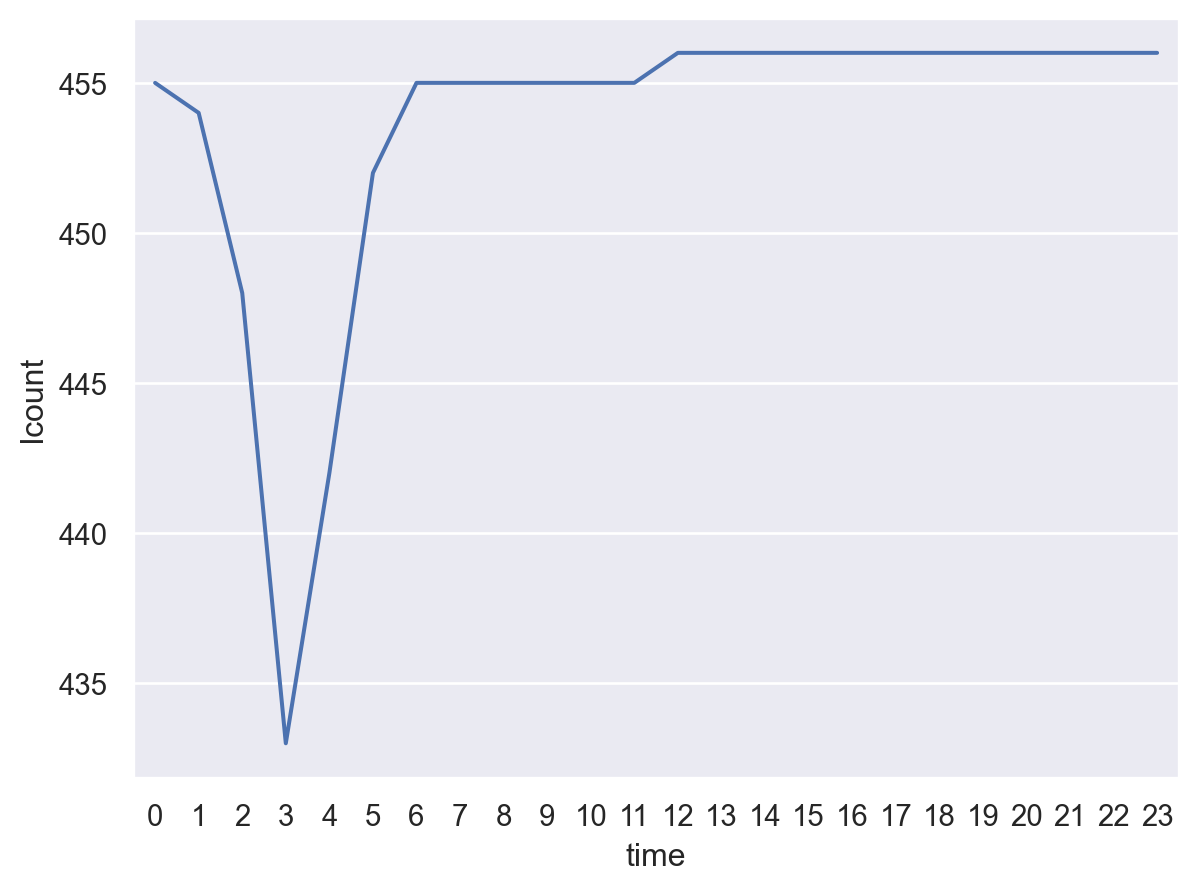

In [126]:
(
    so.Plot(time_share.groupby('time')['lcount'].sum().reset_index(), x='time', y='lcount')
    .add(so.Line())
)

In [127]:
from statsmodels.formula.api import ols 

mod = ols("lcount ~ time * season * weather", data = time_share).fit()

In [128]:
time_share['pred'] = mod.predict(time_share)
time_share

,time,season,weather,lcount,pred
0,0,Spring,Clear,72,72.00
1,0,Spring,Misty+Cloudy,33,33.00
2,0,Spring,Light Snow/Rain,8,8.00
...,...,...,...,...,...
381,23,Winter,Misty+Cloudy,28,28.00
382,23,Winter,Light Snow/Rain,8,8.00
383,23,Winter,Heavy Snow/Rain,0,0.00


In [130]:
time_share['resid'] = mod.resid

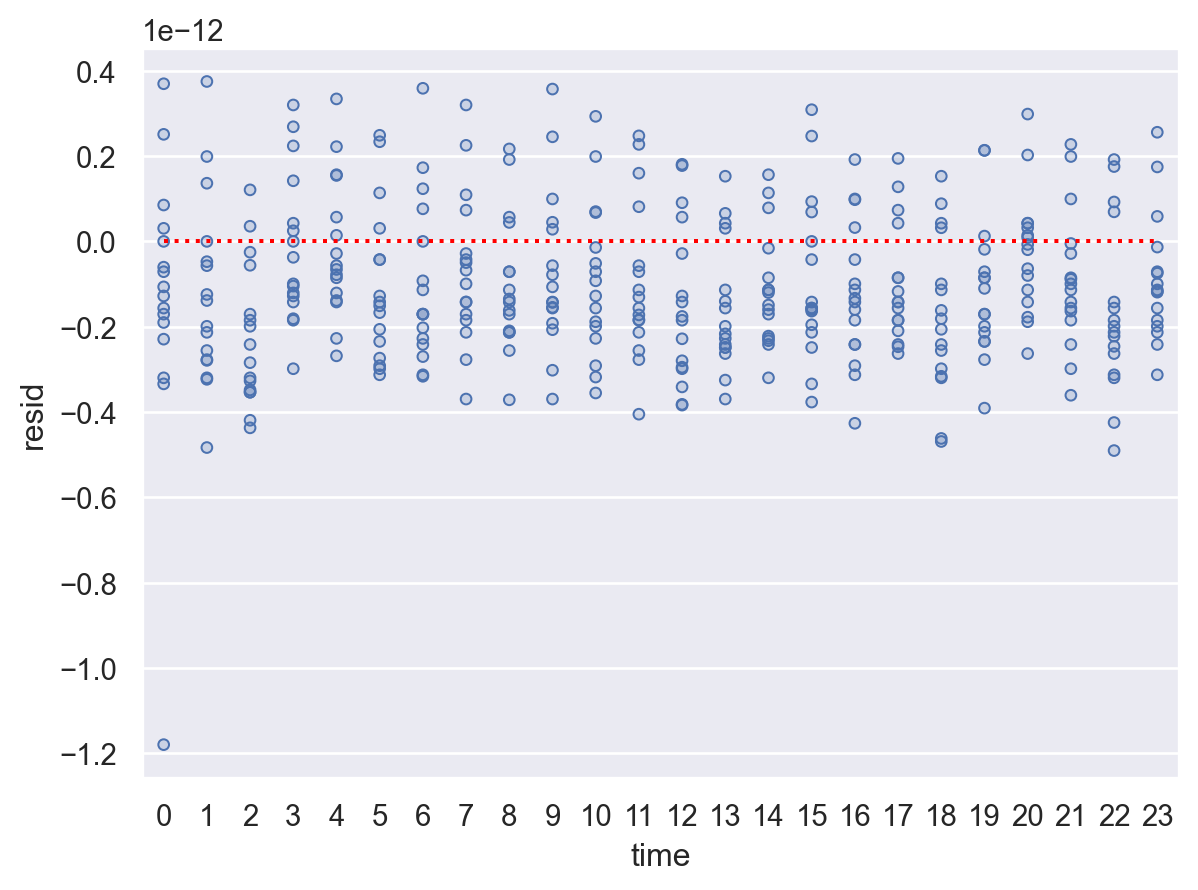

In [131]:
(
    so.Plot(time_share, x='time', y='resid')
    .add(so.Dots())
     .add(so.Line(color="red", linestyle=":"), so.Agg(lambda x: 0))
)